<a href="https://colab.research.google.com/github/Kambey-san/Intro_Med_Data_Analytic/blob/HW_lesson_02/KAA_IMD_HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в анализ данных в медицине
### Урок 2. Источники медицинских данных/ ДЗ

Задание на ознакомление с датасетом по раку груди — сделать описательную статистику нескольких переменных на выбор, выяснить возможный источник выбранных признаков и взаимосвязь с целевой переменной.

In [ ]:
import pandas as pd
import numpy as np
import os
import tarfile
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tar = tarfile.open('clinical.project-tcga-dlbc.2023-09-20.tar.gz', 'r')
tar.extractall('20_2_files')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
os.listdir('20_2_files')

['follow_up.tsv',
 'clinical.tsv',
 'pathology_detail.tsv',
 'exposure.tsv',
 'family_history.tsv']

In [ ]:
df_clin = pd.read_table('20_2_files/clinical.tsv', sep='\t')

In [ ]:
df_clin.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [ ]:
df_exp = pd.read_table('20_2_files/exposure.tsv', sep='\t')

In [ ]:
df_exp.head()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


Посмотрим данные clinical.tsv

In [ ]:
df_clin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Columns: 158 entries, case_id to treatment_type
dtypes: object(158)
memory usage: 131.0+ KB


In [ ]:
df_clin.dtypes

case_id                                     object
case_submitter_id                           object
project_id                                  object
age_at_index                                object
age_is_obfuscated                           object
cause_of_death                              object
cause_of_death_source                       object
country_of_residence_at_enrollment          object
days_to_birth                               object
days_to_death                               object
ethnicity                                   object
gender                                      object
occupation_duration_years                   object
premature_at_birth                          object
race                                        object
vital_status                                object
weeks_gestation_at_birth                    object
year_of_birth                               object
year_of_death                               object
adrenal_hormone                

###Выбраны переменные:
* age_at_index
* race
* gender
* tissue_or_organ_of_origin

In [ ]:
df_clin.describe()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,58,58,1,35,1,1,1,1,49,10,...,1,1,1,1,1,1,1,4,1,3
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
freq,2,2,106,10,106,106,106,106,10,88,...,106,106,106,106,106,106,106,51,106,48


Удалим из датафрейма строки содержащие ['--] - они не содержат искомые данные

In [ ]:
df_clin[df_clin['age_at_index'] == "'--"]

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
14,1ec1e2c4-ba2c-40fc-b5e1-e8f6e38caec6,TCGA-GS-6634,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
17,24506980-2857-4069-9af3-79ce4527eb00,TCGA-GS-6632,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
32,4263949c-f962-40dd-9998-02ad3fba4537,TCGA-GZ-6637,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
33,44f10972-9f1f-4f7d-b8a0-0062c961001b,TCGA-GZ-6640,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
36,4afbf8b8-0c56-4d6d-bd05-13dfd4cbb15f,TCGA-GS-6633,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
69,c81277e2-557f-4129-b0ed-84c74e6c8b1e,TCGA-GS-6630,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
74,d495fa6d-8dbb-46ab-8743-b3d42c06b7a3,TCGA-GS-6631,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
75,d682d35c-0ec5-4e6e-8349-ac2e39bec86f,TCGA-GZ-6638,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
78,dac5f5db-1a2a-47f9-8d46-a3d4eed0864b,TCGA-GS-6629,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
93,f1d74175-f501-4a35-863b-fbaa385a8662,TCGA-GZ-6639,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [ ]:
df_clin.value_counts('gender')

gender
female    52
male      44
'--       10
dtype: int64

In [ ]:
df_clin[df_clin['gender'] == "'--"]

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
14,1ec1e2c4-ba2c-40fc-b5e1-e8f6e38caec6,TCGA-GS-6634,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
17,24506980-2857-4069-9af3-79ce4527eb00,TCGA-GS-6632,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
32,4263949c-f962-40dd-9998-02ad3fba4537,TCGA-GZ-6637,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
33,44f10972-9f1f-4f7d-b8a0-0062c961001b,TCGA-GZ-6640,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
36,4afbf8b8-0c56-4d6d-bd05-13dfd4cbb15f,TCGA-GS-6633,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
69,c81277e2-557f-4129-b0ed-84c74e6c8b1e,TCGA-GS-6630,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
74,d495fa6d-8dbb-46ab-8743-b3d42c06b7a3,TCGA-GS-6631,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
75,d682d35c-0ec5-4e6e-8349-ac2e39bec86f,TCGA-GZ-6638,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
78,dac5f5db-1a2a-47f9-8d46-a3d4eed0864b,TCGA-GS-6629,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
93,f1d74175-f501-4a35-863b-fbaa385a8662,TCGA-GZ-6639,TCGA-DLBC,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [ ]:
c = df_clin.copy()
c

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
5,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
6,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,60,'--,'--,'--,'--,-21959,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
7,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,60,'--,'--,'--,'--,-21959,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
8,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,67,'--,'--,'--,'--,-24590,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
9,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,67,'--,'--,'--,'--,-24590,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [ ]:
c = c.replace("'--", np.nan)
c

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,NaN,NaN,NaN,NaN,-22454,248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,NaN,NaN,NaN,NaN,-22454,248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,NaN,NaN,NaN,NaN,-27025,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,NaN,NaN,NaN,NaN,-27025,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,NaN,NaN,NaN,NaN,-10075,391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
5,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,NaN,NaN,NaN,NaN,-10075,391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Radiation Therapy, NOS"
6,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,60,NaN,NaN,NaN,NaN,-21959,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
7,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,60,NaN,NaN,NaN,NaN,-21959,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Radiation Therapy, NOS"
8,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,67,NaN,NaN,NaN,NaN,-24590,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Radiation Therapy, NOS"
9,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,67,NaN,NaN,NaN,NaN,-24590,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"


In [ ]:
c.describe()

,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,occupation_duration_years,premature_at_birth,weeks_gestation_at_birth,adrenal_hormone,ajcc_clinical_m,ajcc_clinical_n,...,therapeutic_agents,treatment_anatomic_site,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_outcome
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

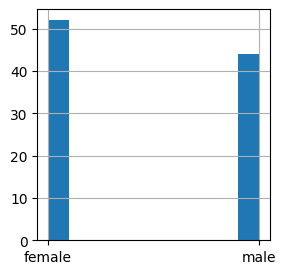

In [ ]:
c['gender'].hist(figsize=(3, 3), grid=True)

In [ ]:
df_t = df_clin[['gender', 'age_at_index']].copy()
df_t

,gender,age_at_index
0,female,61
1,female,61
2,male,73
3,male,73
4,female,27
5,female,27
6,female,60
7,female,60
8,male,67
9,male,67


In [ ]:
df_t.dtypes

gender          object
age_at_index    object
dtype: object

In [ ]:
df_t['gender'].value_counts()

female    52
male      44
'--       10
Name: gender, dtype: int64

In [ ]:
df_t = df_t[df_t['gender'] != 'not reported']
df_t

,gender,age_at_index
0,female,61
1,female,61
2,male,73
3,male,73
4,female,27
5,female,27
6,female,60
7,female,60
8,male,67
9,male,67


<Axes: >

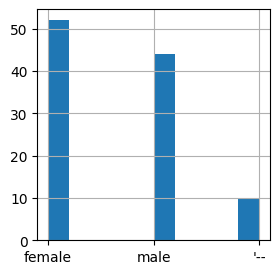

In [ ]:
df_clin['gender'].hist(figsize=(3, 3), grid=True)

<Axes: >

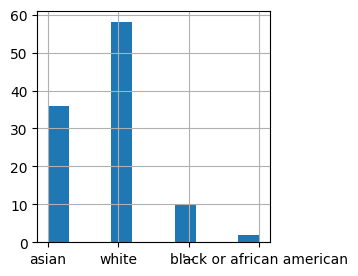

In [ ]:
df_clin['race'].hist(figsize=(3, 3), grid=True)

<Axes: xlabel='age_at_index', ylabel='tissue_or_organ_of_origin'>

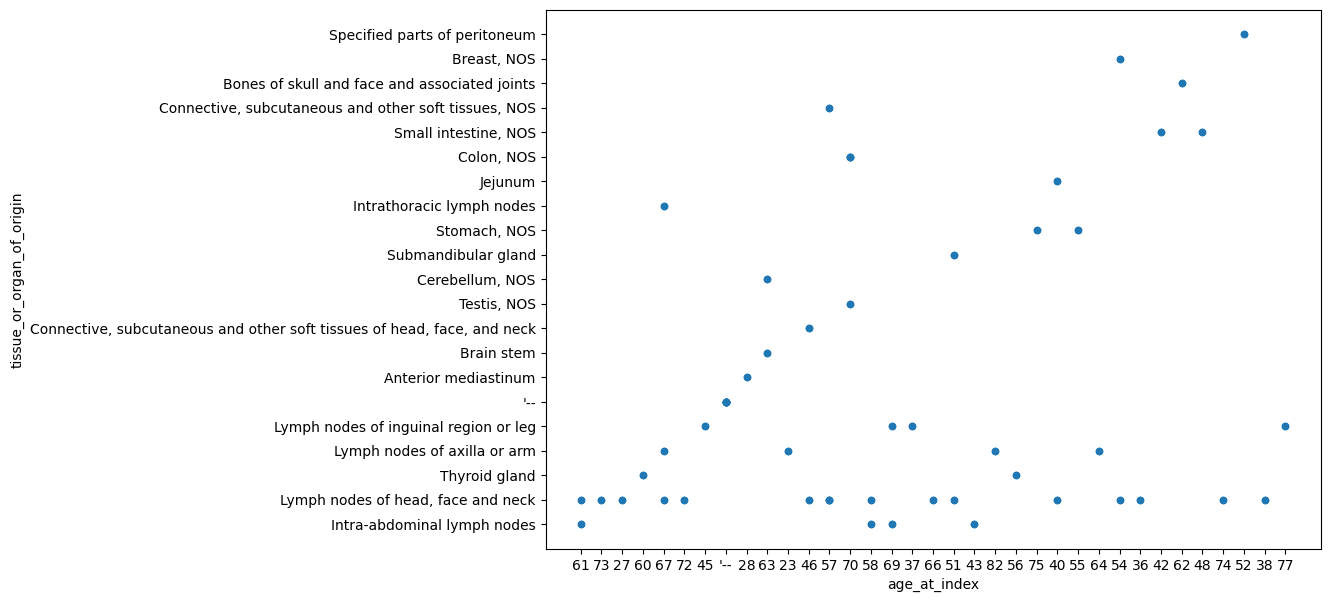

In [ ]:
df_clin.plot(figsize=(10, 7), x='age_at_index', y='tissue_or_organ_of_origin', kind='scatter')

## Выводы:

Эти данные могут быть получены в ходе клинических исследований

Данные рассы, пола, и орган первоначальной опухолевой локализации прямо взаимосвязаны с целевой переменной - тип лечения (treatment_type). Именно эти факторы определяют тактику лечения.
Переменная age_at_index (возраст на момент исследования) на целевую переменную может оказывать вторичное влияние.